# SI100B Python Project (Fall, 2021): 
# Single Cell RNA Sequencing Data Processing - Week 2
*******

Author: `Qi Qin`

Docstring: `Qi Qin`, `Cao Yuhan`

Email: `qinqi@shanghaitech.edu.cn`, `caoyh1@shanghaitech.edu.cn`| Update: `2021-12` 

### Introduction

Single-cell RNA sequencing (scRNA-seq) is an emerging technique to assess individual cell
function and cell-to-cell variability at the single-cell level. This capability has attracted more researchers to
apply scRNA-seq analysis to address research questions.

This notebook works as a workspace where you can verify your implementation. Only your work in `scrna/io.py` and `scrna/preprocess.py` will be graded.
<br/><br/>

In this week, you are expected to:
 - **Section1**: Know how to use `pandas` and `scipy` to parse the input dataset and form a dataframe (15 points).
 - **Section2**: Know how to finish the basic data processing task in scRNA-seq (15 points).
 - **Have fun!**
 
**NOTE**: Please do not try to cheat local judge by modifying its codes or directly assigning the answer.
If you do so, you still cannot pass the online judge.

**Run the cell below to import necessary packages and functions.**

In [1]:
# IMPORTANT: run this cell before runnng any cell to activate auto re-import
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy

# plt.style.use("fivethirtyeight")
%config InlineBackend.figure_format = 'retina'

### The PBMC3K Dataset

For this tutorial, we analyze a dataset of Peripheral Blood Mononuclear Cells *(NOT Monocytes)* (PBMC) extracted from a healthy donor, freely available from [10X Genomics](https://support.10xgenomics.com/single-cell-gene-expression/datasets/1.1.0/pbmc3k). The dataset contains 2,700 single cells sequenced using Illumina NextSeq 500. The raw sequences have been processed by the cellranger pipeline from 10X to extract a unique molecular identifier (UMI) count matrix.

In this matrix, the values (counts) represent the number for each feature (i.e. gene; row) that are detected in each cell (column). Such matrices can be quite large, where here there are 2,700 columns with 32,738 lines, with mostly zero values, i.e. an extremely sparse matrix. To optimize the storage of such a table and the information about the genes and cells, cellranger creates 3 files:

- `genes.tsv`: a tabular file with information about the 32,738 genes in 2 columns (Ensembl gene id and the gene symbol)
- `barcodes.tsv`: a tabular file with the barcode for each of the 2,700 cells
- `matrix.mtx`: a condesed version of the count matrix.

The count matrix is therefore represented by its non-zero values. Each non-zero value is indicated by its line number (1st column), its column number (2nd column) and its value (3rd column). The first row gives indication about the number of lines, column and non-zero values. More information on the Matrix Market Exchange (mtx) format can be found [here](https://math.nist.gov/MatrixMarket/formats.html).

## Section 1: Parse dataset with scipy and pandas
****

The representation of the matrix with 3 files is convenient to share the data but not to process them. Single-cell analysis packages have attempted to solve the problem of storage and analysis by inventing their own standard, which has led to the proliferation of many different “standards” in the scRNA-seq package ecosystem. However, in this tutorial, we do not use any existing data structure, but simply store the data in a dataframe with pandas.

**Complete code at `scrna/io.py/generate_df`**, where you may see more details.

In [18]:
# Local Test - Section 1
# Note: feel free to print out your result to debug if it cannot pass assert

from scrna.io import generate_df

df = generate_df("data/PBMC3K/matrix.mtx", "data/PBMC3K/genes.tsv", "data/PBMC3K/barcodes.tsv")
df

genes,MIR1302-10,FAM138A,OR4F5,RP11-34P13.7,RP11-34P13.8,AL627309.1,RP11-34P13.14,RP11-34P13.9,AP006222.2,RP4-669L17.10,...,KIR3DL2,AL590523.1,CT476828.1,PNRC2,SRSF10,AC145205.1,BAGE5,CU459201.1,AC002321.2,AC002321.1
barcodes,,,,,,,,,,,,,,,,,,,,,
AAACATACAACCAC-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACATTGAGCTAC-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACATTGATCAGC-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCGTGCTTCCG-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCGTGTATGCG-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCGAACTCTCAT-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTCTACTGAGGCA-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTCTACTTCCTCG-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


If you write the code correctly, you will get a dataframe with 2700 rows and 32738 columns; where each row, each barcode, represents a cell; each column, represents a gene; and the value of the data represents the count number of the corresponding gene fragment in the corresponding cell.

In [19]:
assert df.columns.name == 'genes', 'The column name of the dataframe should be name to `genes`'
assert df.index.name == 'barcodes', 'The index name of the dataframe should be name to `barcodes`'
assert df.shape == (2700, 32738), 'Wrong dataframe shape'
assert df.dtypes[0] == int, 'Please convert the data type to int'
assert df.values.sum() == 6390631, 'Seems your data is incorrect'
print("You pass the local test - Section 1 (15%)")

You pass the local test - Section 1 (15%)


## Section 2: Preprocessing
****
After reading in the dataset, as the scRNA-seq data itself is subject to errors caused by various factors, we now need to perform some pre-processing (quality control) on the data to minimize the impact of these errors on the subsequent analysis steps.

To get a better understanding of the data, first we calculate some statistical information about cells and genes.

### Section 2.1: n_genes_by_counts (3 points)

The first section is to calculate the number of genes with at least 1 count in each cell.

**Complete code at `scrna/preprocess.py/n_genes_by_counts`**, where you may see more details.

In [26]:
# Local Test - Section 2.1
# Note: feel free to print out your result to debug if it cannot pass assert

from scrna.preprocess import n_genes_by_counts

qc_n_genes_by_counts = n_genes_by_counts(df)

assert qc_n_genes_by_counts.shape == (2700, )
assert qc_n_genes_by_counts[233] == 506
print("You pass the local test - Section 2.1 (3%)")

You pass the local test - Section 2.1 (3%)


Text(0, 0.5, 'N cells')

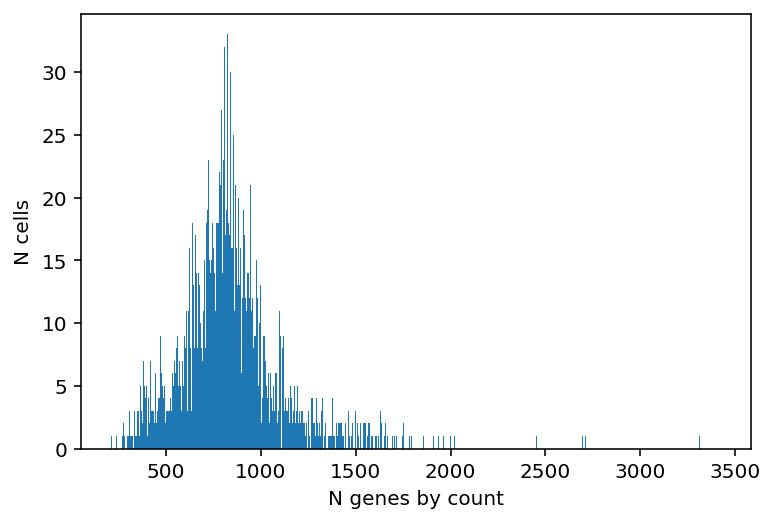

In [5]:
plt.hist(qc_n_genes_by_counts, bins=1000)
plt.xlabel('N genes by counts')
plt.ylabel('N cells')

### Section 2.2: total_counts (3 points)

The second section is to calculate the total number of counts in each cell.

**Complete code at `scrna/preprocess.py/total_counts`**, where you may see more details.

In [27]:
# Local Test - Section 2.2
# Note: feel free to print out your result to debug if it cannot pass assert

from scrna.preprocess import total_counts

qc_total_counts = total_counts(df)

assert qc_total_counts.shape == (2700, )
assert qc_total_counts[2333] == 2866
print("You pass the local test - Section 2.2 (3%)")

You pass the local test - Section 2.2 (3%)


Text(0, 0.5, 'N cells')

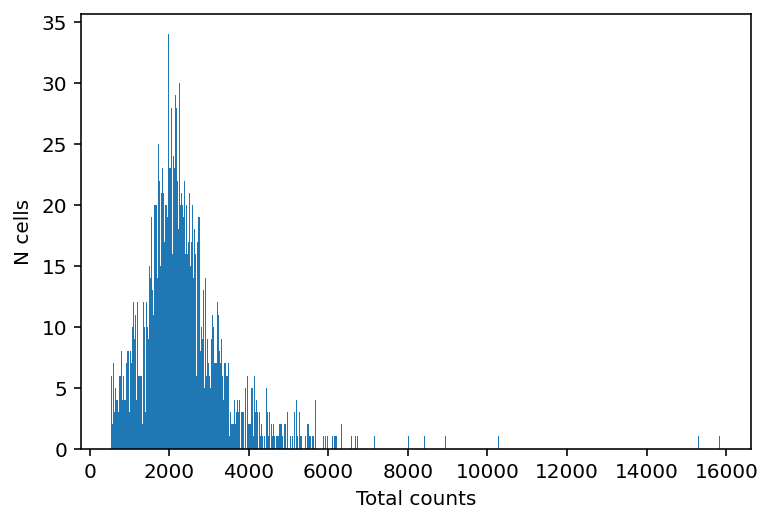

In [28]:
plt.hist(qc_total_counts, bins=1000)
plt.xlabel('Total counts')
plt.ylabel('N cells')

### Section 2.3: highest_expr_genes (3 points)

The third section is to calculate the total number of counts in each cell.

**Complete code at `scrna/preprocess.py/highest_expr_genes`**, where you may see more details.

In [39]:
# Local Test - Section 2.3
# Note: feel free to print out your result to debug if it cannot pass assert

from scrna.preprocess import highest_expr_genes

qc_highest_expr_genes = highest_expr_genes(df, 5)

assert len(qc_highest_expr_genes) == 5
assert qc_highest_expr_genes == ['MALAT1', 'TMSB4X', 'B2M', 'RPL10', 'RPL13']
print("You pass the local test - Section 2.3 (3%)")

genes             MIR1302-10  FAM138A  OR4F5  RP11-34P13.7  RP11-34P13.8  \
barcodes                                                                   
AAACATACAACCAC-1         0.0      0.0    0.0           0.0           0.0   
AAACATTGAGCTAC-1         0.0      0.0    0.0           0.0           0.0   
AAACATTGATCAGC-1         0.0      0.0    0.0           0.0           0.0   
AAACCGTGCTTCCG-1         0.0      0.0    0.0           0.0           0.0   
AAACCGTGTATGCG-1         0.0      0.0    0.0           0.0           0.0   
...                      ...      ...    ...           ...           ...   
TTTCGAACTCTCAT-1         0.0      0.0    0.0           0.0           0.0   
TTTCTACTGAGGCA-1         0.0      0.0    0.0           0.0           0.0   
TTTCTACTTCCTCG-1         0.0      0.0    0.0           0.0           0.0   
TTTGCATGAGAGGC-1         0.0      0.0    0.0           0.0           0.0   
TTTGCATGCCTCAC-1         0.0      0.0    0.0           0.0           0.0   

genes      

After understanding the distribution of the data, we can then filter out the bad cells and genes.

### Section 2.4: filter_cells (3 points)

First, we want to filter cells.

**Complete code at `scrna/preprocess.py/filter_cells`**, where you may see more details.

In [9]:
# Local Test - Section 2.4
# Note: feel free to print out your result to debug if it cannot pass assert

from scrna.preprocess import filter_cells

filtered_df = filter_cells(df, min_counts=200)
filtered_df = filter_cells(filtered_df, max_counts=5000)
assert filtered_df.shape == (2631, 32738)
print("You pass the local test - Section 2.4 (3%)")

You pass the local test - Section 2.4 (3%)


### Section 2.5: filter_genes (3 points)

Second, we want to filter genes.

**Complete code at `scrna/preprocess.py/filter_genes`**, where you may see more details.

In [10]:
# Local Test - Section 2.5
# Note: feel free to print out your result to debug if it cannot pass assert
# Please note that there might be columns with the same name

from scrna.preprocess import filter_genes

filtered_df = filter_genes(df, min_cells=3)
assert filtered_df.shape == (2700, 13714)
print("You pass the local test - Section 2.5 (3%)")

You pass the local test - Section 2.5 (3%)


## Reference
```
[1] Clustering 3K PBMCs with Scanpy https://training.galaxyproject.org/training-material/topics/transcriptomics/tutorials/scrna-scanpy-pbmc3k/tutorial.html
[2] Preprocessing and clustering 3k PBMCs https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html
```